# Movie Production Analysis

## Business Sense

- Define the best timeline to roll out original content
    - movies profit margin per movie by release month
    - number and gross of movies per month grouped by genre
- Define the production budget and prifit margin
    - find a sweet spot that optimizes profit wrt production budget
    - look for actors and directors that make movies at the budget level

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
mojo_df = pd.read_csv      ('../zippedData/bom.movie_gross.csv.gz')
rt_info_df = pd.read_csv   ('../zippedData/rt.movie_info.tsv.gz', sep='\t', encoding='iso8859_1')
rt_review_df = pd.read_csv ('../zippedData/rt.reviews.tsv.gz'   , sep='\t', encoding='iso8859_1')
tmbd_df = pd.read_csv      ('../zippedData/tmdb.movies.csv.gz'  , index_col=0)
tn_df = pd.read_csv        ('../zippedData/tn.movie_budgets.csv.gz')

# Regarding Month to Roll out Original Material
## Using The Numbers

In [18]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


- Converting the string date to datetime64

In [4]:
tn_df.release_date = pd.DatetimeIndex(tn_df.release_date)

- Adding day, month, and year columns to the data set

In [5]:
tn_df['day']   = tn_df.release_date.dt.dayofweek
tn_df['month'] = tn_df.release_date.dt.month
tn_df['year']  = tn_df.release_date.dt.year

- Find the year range of the data set.

In [6]:
tn_df.year.min(),tn_df.year.max()

(1915, 2020)

- Only look at movies that were released after 1960.

In [7]:
tn_df = tn_df[tn_df['year'] > 1960]

- Converting the grossing and budget columns to float type

In [8]:
tn_df['production_budget'] = tn_df['production_budget']\
    .str.replace(',','').str.replace('$',"").astype(float)

In [9]:
tn_df['domestic_gross'] = tn_df['domestic_gross']\
    .str.replace(',','').str.replace('$',"").astype(float)

In [10]:
tn_df['worldwide_gross'] = tn_df['worldwide_gross']\
    .str.replace(',','').str.replace('$',"").astype(float)

In [11]:
tn_df = tn_df[(tn_df['production_budget'] > 0.0)]
tn_df = tn_df[tn_df['worldwide_gross'] > 0.0]
tn_df = tn_df[tn_df['domestic_gross'] > 0.0]

- Adding new column for net profit domestic and world

In [12]:
tn_df['world_net'] = tn_df['worldwide_gross'] - tn_df['production_budget']

In [13]:
tn_df['domestic_net'] = tn_df['domestic_gross'] - tn_df['production_budget']

## - Regarding the World/Domestic Profits Relative to Month of Release

- Set up variables grouped on month that hold the sum of world net and domestic net respectively by month

In [14]:
world_ave_net_per_movie = tn_df.groupby('month').sum()['world_net']\
    /tn_df.groupby('month').count()['movie']
domestic_ave_net_per_movie = tn_df.groupby('month').sum()['domestic_net']\
    /tn_df.groupby('month').count()['movie']

- Setting up month map for graphing

In [15]:
month_map = {0:'January',1:'Febuary',2:'March',3:'April',4:'May',5:'June',6:'July',7:'August',8:'September',9:'October',10:'November',11:'December'}

Text(0, 0.5, 'Average Net Income/Movie (in Millions)')

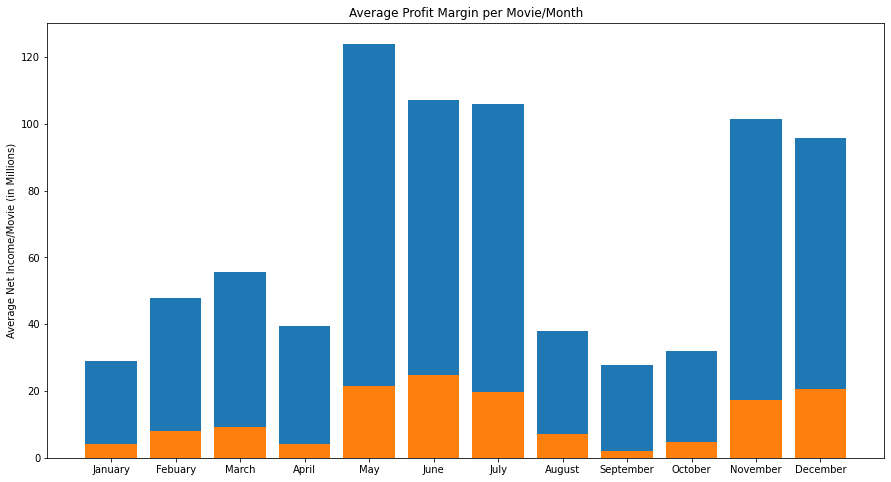

In [16]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(month_map.values(),world_ave_net_per_movie/1000000)
ax.bar(month_map.values(),domestic_ave_net_per_movie/1000000)
ax.set_title('Average Profit Margin per Movie/Month')
ax.set_ylabel('Average Net Income/Movie (in Millions)')

This plot of the net prifits of films released after 1960 shows the total net profits of movies divided by the number of movies in the month that they were released. This gives an Idea of the average net profit per movie given a specific month. Judging from this comparrison, it can be concluded that the months that generally yeild the most profit for a new release are the Summer months of May,June,July and the holliday months of November and December.

# Regarding What Genre of Movie to Release During Prime Seasons
## Using Rotten Tomatoes and The Numbers Datasets

In [19]:
rt_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
